In [1]:
from datetime import datetime, timedelta
import datetime as dt
from sqlalchemy import create_engine, text
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree , DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import r2_score
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, f1_score , accuracy_score, classification_report ,recall_score,precision_score




from sklearn import svm


import warnings
warnings.filterwarnings("ignore")

In [2]:
class UserDefinedException(Exception):
    pass

In [3]:
def get_connection(user, password, host, port, database):
    return create_engine(
        url="postgresql://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        )
    )


def get_engine(db_user, password, db_name, db_host="localhost", port="5432"):
    print("Creating postgresDB engine")
    try:
        engine = None
        engine = get_connection(db_user, password, db_host, port, db_name)
        engine = engine.connect()
        print("Postgres engine created successfully")
        return engine
    except Exception as e:
        print(f"Failed while connecting to DB {e}")
        
def invoke_db_engine():
    
    return get_engine(db_user="postgres", password="welcome", db_name="crypto_currency_rates", db_host="34.122.54.166")

postgres_engine =  invoke_db_engine()
    

Creating postgresDB engine
Postgres engine created successfully


In [4]:
try :
    if postgres_engine:
        print("DB engine is active..Proceeding further")
    else : raise UserDefinedException ("DB inactive, aborting process")
except UserDefinedException as e:
    print(e)

DB engine is active..Proceeding further


In [5]:
def get_data_from_database(query, engine):
    try:
        data = pd.read_sql(text(query) , con = engine)
        if data.empty:
            raise UserDefinedException("Data Not available")
        return data
    except UserDefinedException as e:
        print(e)
    except Exception as e:
        print(e)

In [6]:
def return_null_value_summary(data):
    return data.isnull().sum().to_dict()


In [7]:
crypto_currency_rates = get_data_from_database("select * from crypto_currency_rates;" , postgres_engine)
crypto_currency_rates.head()

,id,rank,supply,maximum_supply,market_cap_usd,volume_usd,price_usd,change_percent,last_updated
0,bitcoin,1,1.937074e+07,21000000.0,5.198562e+11,4.735543e+09,26837.18245,-2.658,2023-05-12 13:32:49.496262+00:00
1,ethereum,2,1.203097e+08,NaN,2.146435e+11,3.475851e+09,1784.09157,-2.781,2023-05-12 13:32:49.496262+00:00
2,tether,3,8.272651e+10,NaN,8.282014e+10,8.776083e+09,1.00113,-0.024,2023-05-12 13:32:49.496262+00:00
3,binance-coin,4,1.668011e+08,166801148.0,5.122671e+10,1.792506e+08,307.11243,-2.101,2023-05-12 13:32:49.496262+00:00
4,usd-coin,5,2.998832e+10,NaN,3.001038e+10,8.124771e+08,1.00074,0.008,2023-05-12 13:32:49.496262+00:00


In [8]:
return_null_value_summary(crypto_currency_rates)

{'id': 0,
 'rank': 0,
 'supply': 0,
 'maximum_supply': 40,
 'market_cap_usd': 0,
 'volume_usd': 0,
 'price_usd': 0,
 'change_percent': 0,
 'last_updated': 0}

In [9]:
crypto_currency_rates['maximum_supply'] = crypto_currency_rates[['supply','maximum_supply']].apply(lambda x : x['maximum_supply']
                                                        if not np.isnan(x['maximum_supply'])  else x['supply'],axis = 1)

crypto_currency_rates['supply_left'] =   crypto_currency_rates[['supply','maximum_supply']].apply(lambda x :
                                                            x['maximum_supply'] - x['supply'],axis = 1)


In [10]:
crypto_currency_rates.head(100)

,id,rank,supply,maximum_supply,market_cap_usd,volume_usd,price_usd,change_percent,last_updated,supply_left
0,bitcoin,1,1.937074e+07,2.100000e+07,5.198562e+11,4.735543e+09,26837.18245,-2.658,2023-05-12 13:32:49.496262+00:00,1.629257e+06
1,ethereum,2,1.203097e+08,1.203097e+08,2.146435e+11,3.475851e+09,1784.09157,-2.781,2023-05-12 13:32:49.496262+00:00,0.000000e+00
2,tether,3,8.272651e+10,8.272651e+10,8.282014e+10,8.776083e+09,1.00113,-0.024,2023-05-12 13:32:49.496262+00:00,0.000000e+00
3,binance-coin,4,1.668011e+08,1.668011e+08,5.122671e+10,1.792506e+08,307.11243,-2.101,2023-05-12 13:32:49.496262+00:00,0.000000e+00
4,usd-coin,5,2.998832e+10,2.998832e+10,3.001038e+10,8.124771e+08,1.00074,0.008,2023-05-12 13:32:49.496262+00:00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
95,holo,96,1.734674e+11,1.734674e+11,2.763792e+08,1.825297e+06,0.00159,-4.069,2023-05-12 13:32:49.496262+00:00,0.000000e+00
96,balancer,97,4.948416e+07,9.615070e+07,2.692274e+08,1.274077e+06,5.44068,-2.325,2023-05-12 13:32:49.496262+00:00,4.666655e+07
97,defichain,98,6.992736e+08,1.200000e+09,2.686870e+08,5.923682e+05,0.38424,-2.628,2023-05-12 13:32:49.496262+00:00,5.007264e+08
98,decred,99,1.494112e+07,2.100000e+07,2.677064e+08,3.454571e+06,17.91742,6.748,2023-05-12 13:32:49.496262+00:00,6.058879e+06


In [11]:
current_day_summary = f"""with temp_data as (select id ,  max("rank") max_rank , min("rank") min_rank , min(price_usd) min_price , max(price_usd) max_price 
from crypto_currency_rates_dump cd  where event_occurred_at::date =current_date-1 group by id  order by  id)
select ccr.id, min_rank , max_rank , ccr."rank" current_rank , cd."rank" starting_rank ,  ccr.price_usd  current_price  ,cd.price_usd starting_price,
min_price , max_price , current_date -1 as report_date
from temp_data td inner join crypto_currency_rate ccr 
on td.id = ccr.id 
left join crypto_currency_rates_dump cd on ccr.id = cd.id 
where inserted_at = 
(select  min(inserted_at)  from  crypto_currency_rates_dump where event_occurred_at::date = current_date - 1 ); """  

current_day_crypto_currency_rates = get_data_from_database(current_day_summary , postgres_engine)

current_day_crypto_currency_rates.head()


,id,min_rank,max_rank,current_rank,starting_rank,current_price,starting_price,min_price,max_price,report_date
0,bitcoin,1,1,1,1,27582.37431,27652.55214,26870.56828,27652.55214,2023-05-11
1,ethereum,2,2,2,2,1836.41421,1844.31385,1788.79984,1844.31385,2023-05-11
2,tether,3,3,3,3,1.00167,1.00163,1.00052,1.00172,2023-05-11
3,binance-coin,4,4,4,4,314.40068,314.78422,306.62461,314.82497,2023-05-11
4,usd-coin,5,5,5,5,1.00117,1.00114,0.99948,1.00190,2023-05-11


In [12]:
return_null_value_summary(current_day_crypto_currency_rates)

{'id': 0,
 'min_rank': 0,
 'max_rank': 0,
 'current_rank': 0,
 'starting_rank': 0,
 'current_price': 0,
 'starting_price': 0,
 'min_price': 0,
 'max_price': 0,
 'report_date': 0}

In [13]:
crypto_currency_daily_summary = get_data_from_database("select id , current_price , starting_price , report_date , status from crypto_currency_daily_stats ;" , postgres_engine)
crypto_currency_daily_summary.head()

,id,current_price,starting_price,report_date,status
0,bitcoin,27582.37431,27639.59090,2023-05-10,Loss
1,ethereum,1836.41421,1841.88894,2023-05-10,Loss
2,tether,1.00167,1.00142,2023-05-10,stable
3,binance-coin,314.40068,314.75566,2023-05-10,Loss
4,usd-coin,1.00117,1.00056,2023-05-10,stable


In [14]:
current_day_crypto_currency_rates['difference'] = current_day_crypto_currency_rates[['current_price', 'starting_price']].apply(
lambda x : x['current_price']-x['starting_price'],axis = 1)

current_day_crypto_currency_rates['status'] = current_day_crypto_currency_rates['difference'].apply(lambda x: 
 'Loss' if   x < 0 else ('stable' if x<=0.25 else 'Gain'))

current_day_crypto_currency_rates.head()


,id,min_rank,max_rank,current_rank,starting_rank,current_price,starting_price,min_price,max_price,report_date,difference,status
0,bitcoin,1,1,1,1,27582.37431,27652.55214,26870.56828,27652.55214,2023-05-11,-70.17783,Loss
1,ethereum,2,2,2,2,1836.41421,1844.31385,1788.79984,1844.31385,2023-05-11,-7.89964,Loss
2,tether,3,3,3,3,1.00167,1.00163,1.00052,1.00172,2023-05-11,0.00004,stable
3,binance-coin,4,4,4,4,314.40068,314.78422,306.62461,314.82497,2023-05-11,-0.38354,Loss
4,usd-coin,5,5,5,5,1.00117,1.00114,0.99948,1.00190,2023-05-11,0.00003,stable


In [15]:
# current_day_crypto_currency_rates.to_sql(name='crypto_currency_daily_stats', con=postgres_engine, schema='public', if_exists='append',
#                     index=False)
# postgres_engine.commit()

In [16]:
crypto_currency_dumps_query = f"""select * from crypto_currency_rates_dump """  

crypto_currency_dump = get_data_from_database(crypto_currency_dumps_query , postgres_engine)

crypto_currency_dump.head()

,event_id,id,rank,supply,maximum_supply,market_cap_usd,volume_usd,price_usd,change_percent,event_occurred_at,inserted_at
0,7655822311278325,bitcoin,1,1.936974e+07,21000000.0,5.353716e+11,6.415396e+09,27639.59090,0.034,2023-05-10 23:37:00.259,2023-05-12 13:32:38.639187+00:00
1,7655822311278325,ethereum,2,1.203177e+08,NaN,2.216118e+11,4.246103e+09,1841.88894,-0.338,2023-05-10 23:37:00.259,2023-05-12 13:32:38.639187+00:00
2,7655822311278325,tether,3,8.249190e+10,NaN,8.260936e+10,1.117401e+10,1.00142,0.009,2023-05-10 23:37:00.259,2023-05-12 13:32:38.639187+00:00
3,7655822311278325,binance-coin,4,1.668011e+08,166801148.0,5.250160e+10,1.938919e+08,314.75566,0.800,2023-05-10 23:37:00.259,2023-05-12 13:32:38.639187+00:00
4,7655822311278325,usd-coin,5,3.012653e+10,NaN,3.014351e+10,8.547300e+08,1.00056,0.000,2023-05-10 23:37:00.259,2023-05-12 13:32:38.639187+00:00


In [17]:
crypto_currency_daily_stats = f"""select * from crypto_currency_daily_stats """  

crypto_currency_daily_stats = get_data_from_database(crypto_currency_daily_stats , postgres_engine)

crypto_currency_daily_stats.head()

,id,min_rank,max_rank,current_rank,starting_rank,current_price,starting_price,min_price,max_price,report_date,difference,status
0,bitcoin,1,1,1,1,27582.37431,27639.59090,27639.06981,27675.69650,2023-05-10,-57.21659,Loss
1,ethereum,2,2,2,2,1836.41421,1841.88894,1841.88894,1845.56224,2023-05-10,-5.47473,Loss
2,tether,3,3,3,3,1.00167,1.00142,1.00137,1.00162,2023-05-10,0.00025,stable
3,binance-coin,4,4,4,4,314.40068,314.75566,314.75566,315.13744,2023-05-10,-0.35498,Loss
4,usd-coin,5,5,5,5,1.00117,1.00056,1.00056,1.00123,2023-05-10,0.00061,stable


In [18]:
return_null_value_summary(crypto_currency_dump)

{'event_id': 0,
 'id': 0,
 'rank': 0,
 'supply': 0,
 'maximum_supply': 20395,
 'market_cap_usd': 0,
 'volume_usd': 0,
 'price_usd': 0,
 'change_percent': 0,
 'event_occurred_at': 0,
 'inserted_at': 0}

In [19]:
crypto_currency_dump['maximum_supply'] = crypto_currency_dump[['supply','maximum_supply']].apply(lambda x : x['maximum_supply']
                                                        if not np.isnan(x['maximum_supply'])  else x['supply'],axis = 1)

current_day_crypto_currency_rates.head()

,id,min_rank,max_rank,current_rank,starting_rank,current_price,starting_price,min_price,max_price,report_date,difference,status
0,bitcoin,1,1,1,1,27582.37431,27652.55214,26870.56828,27652.55214,2023-05-11,-70.17783,Loss
1,ethereum,2,2,2,2,1836.41421,1844.31385,1788.79984,1844.31385,2023-05-11,-7.89964,Loss
2,tether,3,3,3,3,1.00167,1.00163,1.00052,1.00172,2023-05-11,0.00004,stable
3,binance-coin,4,4,4,4,314.40068,314.78422,306.62461,314.82497,2023-05-11,-0.38354,Loss
4,usd-coin,5,5,5,5,1.00117,1.00114,0.99948,1.00190,2023-05-11,0.00003,stable


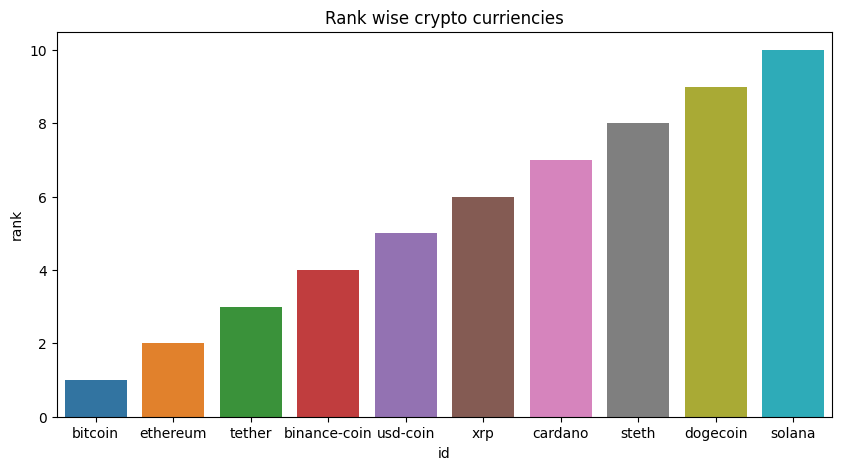

In [20]:
plt.subplots(figsize = ([10,5]))
crypto_currency_rates_rank = crypto_currency_rates.nsmallest(10, 'rank')
sns.barplot(x = 'id', y = 'rank' , data = crypto_currency_rates_rank )
plt.title('Rank wise crypto curriencies')
plt.show()

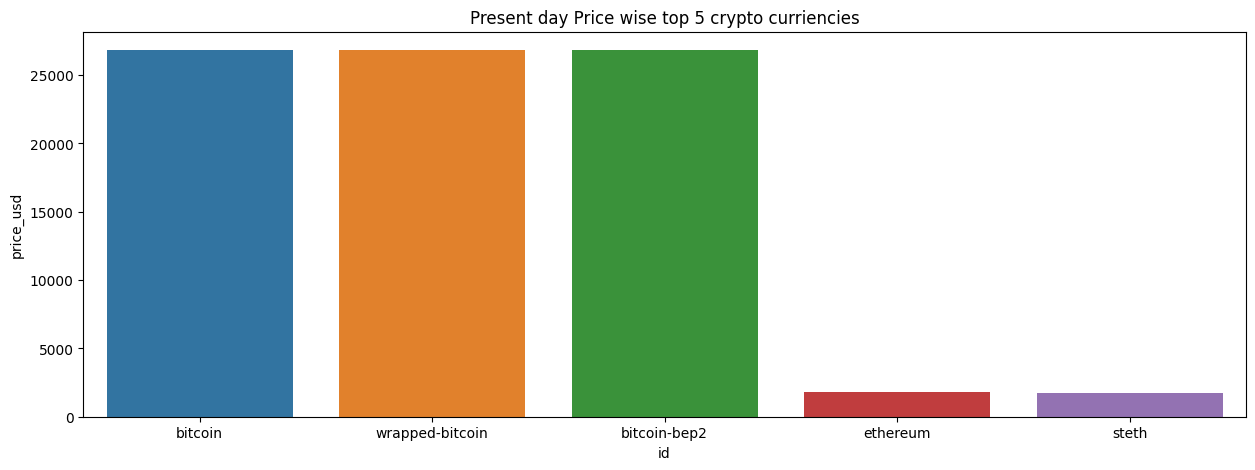

In [21]:
plt.subplots(figsize = ([15,5]))
crypto_currency_rates_cost = crypto_currency_rates.nlargest(5, 'price_usd')
sns.barplot(x = 'id', y = 'price_usd' , data = crypto_currency_rates_cost )
plt.title('Present day Price wise top 5 crypto curriencies')
plt.show()

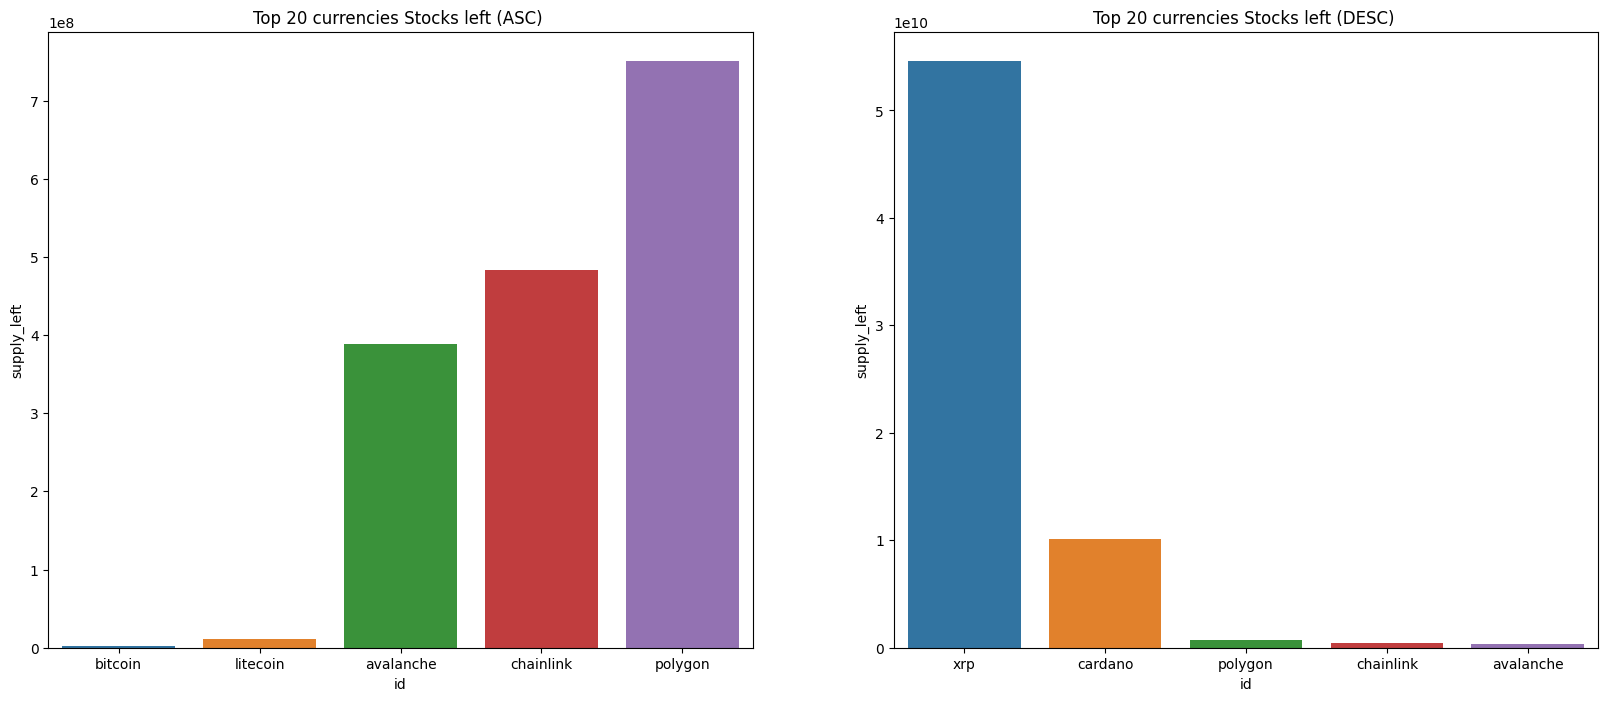

In [22]:
crypto_currency_rates_top_20 = crypto_currency_rates[(crypto_currency_rates['rank'] < 21) &( crypto_currency_rates['supply_left'] > 0)]
crypto_currency_rates_supply_left = crypto_currency_rates_top_20.nsmallest(5, 'supply_left')
crypto_currency_rates_supply_left_largest = crypto_currency_rates_top_20.nlargest(5, 'supply_left')

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x = 'id', y = 'supply_left' , data = crypto_currency_rates_supply_left,ax = axis1 ).set_title("Top 20 currencies Stocks left (ASC) ")
sns.barplot(x = 'id', y = 'supply_left' , data = crypto_currency_rates_supply_left_largest,ax = axis2 ).set_title("Top 20 currencies Stocks left (DESC) ")
plt.show()

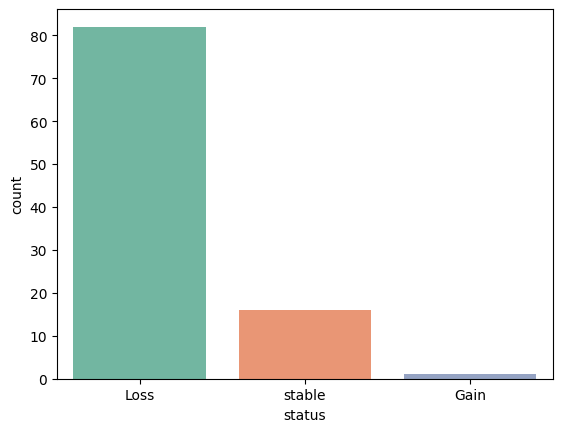

In [23]:
sns.countplot(x='status',   palette="Set2" , data=current_day_crypto_currency_rates )
plt.show()

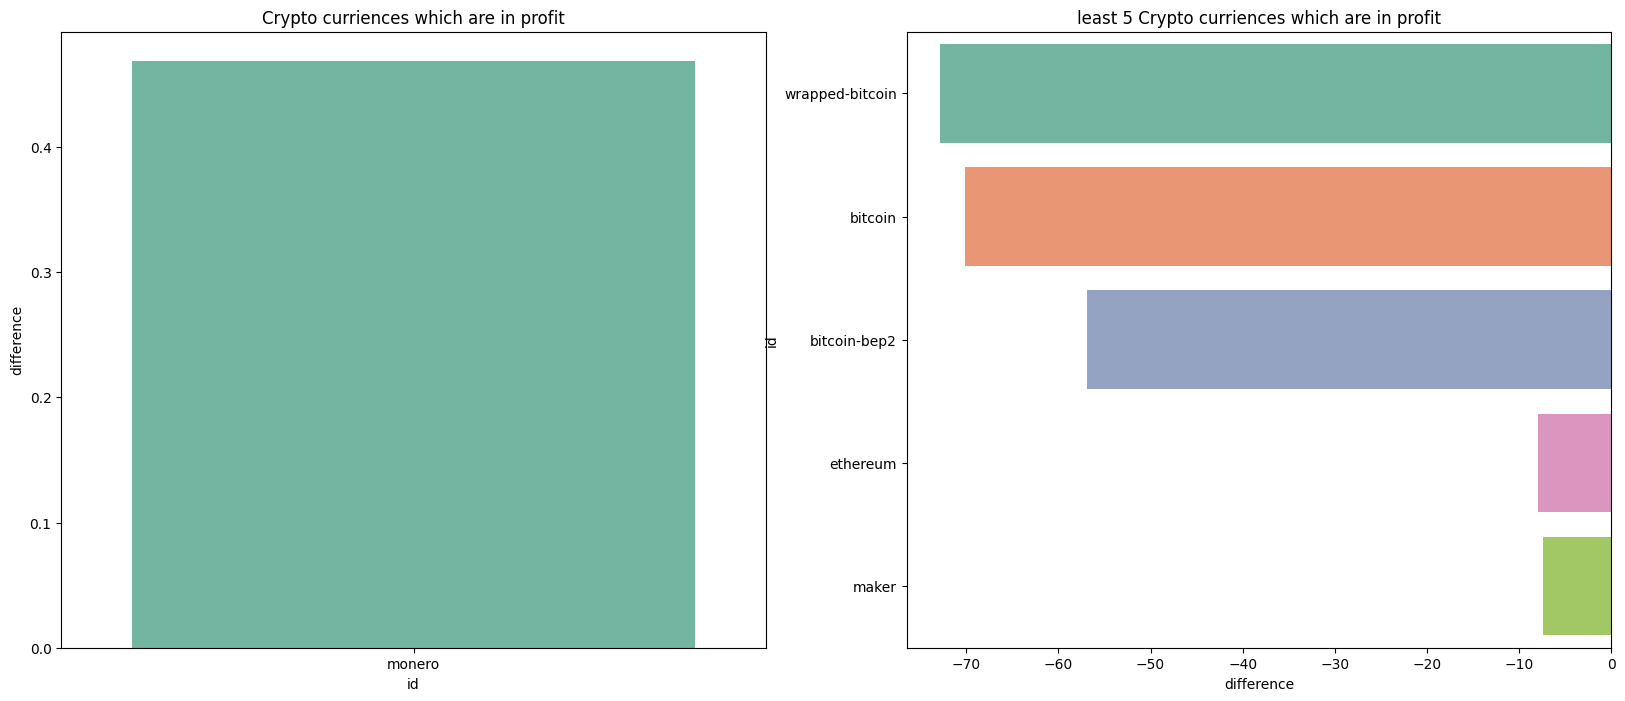

In [24]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 8))
gain_data = current_day_crypto_currency_rates[current_day_crypto_currency_rates['status'] == 'Gain'].nlargest(5, 'difference')
loss_data = current_day_crypto_currency_rates[current_day_crypto_currency_rates['status'] == 'Loss'].nsmallest(5, 'difference')

sns.barplot(x = 'id', y = 'difference' , palette="Set2", data = gain_data,ax = axis1 ).set_title("Crypto curriences which are in profit")
sns.barplot(y = 'id', x = 'difference' , palette="Set2" ,data = loss_data,ax = axis2 ).set_title("least 5 Crypto curriences which are in profit")

plt.show()

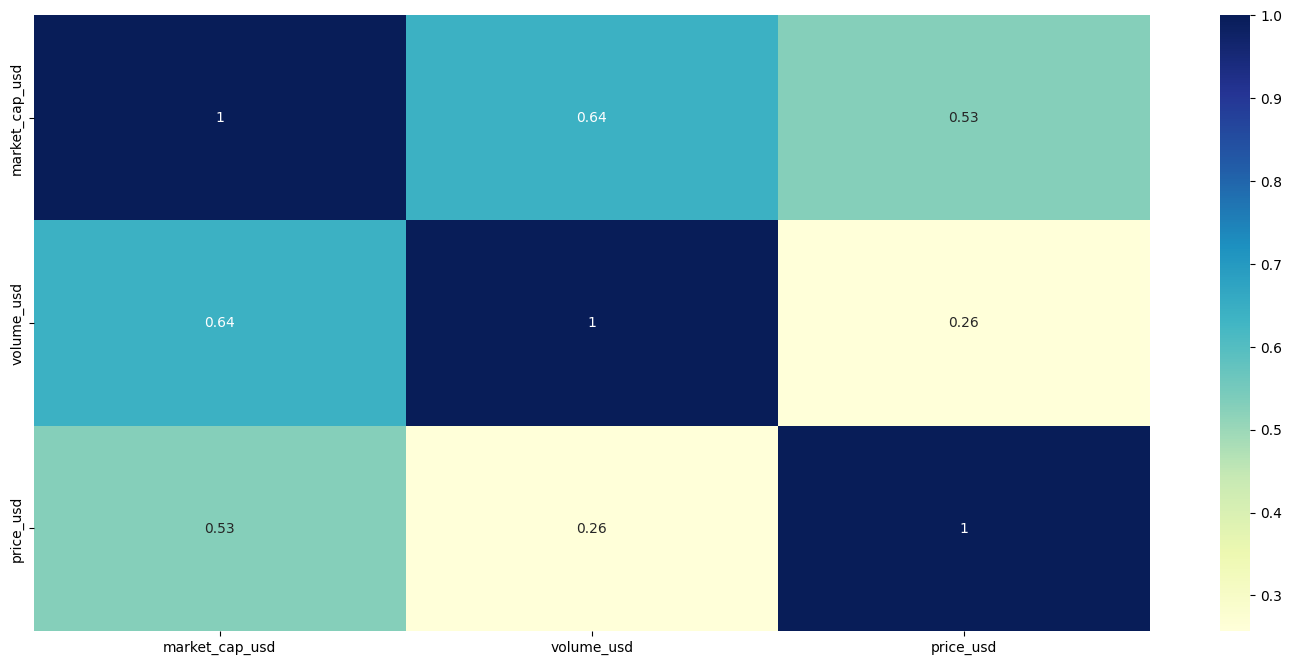

In [25]:
plt.subplots(figsize = ([18,8]))
price_cols = [col for col in crypto_currency_rates.columns if col.endswith('usd')]
sns.heatmap(crypto_currency_rates[price_cols].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [26]:
def split_data(feature , dependent,  random_state = 20):
    X_train, X_test, Y_train, Y_test = train_test_split(
                                    feature,  dependent,  test_size = 0.3 ,  random_state = random_state)
    print(f"Train and test data shapes {X_train.shape} , {X_test.shape}" , end = "\n\n")
    return X_train, X_test, Y_train, Y_test


def evaluate_regression(model , X_train, y_train , X_test , y_test, source , epochs=0 ):
    if epochs <= 0:
        model.fit(X_train, y_train)
    else : model.fit(X_train, y_train, epochs = epochs)
    prediction = model.predict(X_test)
    return compute_scores(model,prediction ,y_test,source )

def compute_scores(model,Predicted_values , Test_values , source ):
    mse = mean_squared_error(Predicted_values, Test_values)
    rmse = np.sqrt(mse)
    r2_Score = r2_score(Predicted_values, Test_values)
    df = pd.DataFrame({"Model"           : [type(model).__name__],
                       "mse"        : [mse],
                       "rmse"          : [rmse],
                       "r2_Score"       : [r2_Score],
                       "model_source" : source
                      })

    return df.reset_index(drop = True)

In [27]:
crypto_currency_dump["event_occurred_at"] = (crypto_currency_dump["event_occurred_at"] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')

feature_data = crypto_currency_dump[['rank', 'supply', 'maximum_supply', 'market_cap_usd', 'volume_usd','event_occurred_at']]
dependent_data = crypto_currency_dump['price_usd'].apply(lambda x : int(x))

scaler = StandardScaler()
feature_data = scaler.fit_transform(feature_data)

X_train, X_test, y_train, y_test  = split_data(feature_data,dependent_data)

Train and test data shapes (35350, 6) , (15150, 6)



In [28]:
def initilize_models():
    decision_tree_regressor = DecisionTreeRegressor(random_state=42)
    random_forest_regressor = RandomForestRegressor(random_state=42)
    naive_regressor = GaussianNB()

    ann_model = Sequential()
    ann_model.add(Dense(12, input_shape=(6,), activation='relu'))
    ann_model.add(Dense(8, activation='relu'))
    ann_model.add(Dense(1))
    ann_model.compile(loss='mse', optimizer=Adam(lr=0.01))
    return decision_tree_regressor , random_forest_regressor,naive_regressor,ann_model

final_data_frame = pd.DataFrame()
decision_tree_regressor , random_forest_regressor,naive_regressor,ann_model = initilize_models()


In [29]:
final_data_frame = final_data_frame.append(evaluate_regression(decision_tree_regressor , X_train,y_train, X_test, y_test , "Price prediction")
                                           ,ignore_index = True)
final_data_frame = final_data_frame.append(evaluate_regression(random_forest_regressor , X_train,y_train, X_test, y_test , "Price prediction")
                                           ,ignore_index = True)
final_data_frame = final_data_frame.append(evaluate_regression(ann_model , X_train,y_train, X_test, y_test , "Price prediction",200)
                                           ,ignore_index = True)

Epoch 1/200
1105/1105 [==============================] - 0s 234us/step - loss: 22329050.0000
Epoch 2/200
1105/1105 [==============================] - 0s 231us/step - loss: 20275458.0000
Epoch 3/200
1105/1105 [==============================] - 0s 238us/step - loss: 18066680.0000
Epoch 4/200
1105/1105 [==============================] - 0s 229us/step - loss: 16985988.0000
Epoch 5/200
1105/1105 [==============================] - 0s 226us/step - loss: 16252707.0000
Epoch 6/200
1105/1105 [==============================] - 0s 226us/step - loss: 15689276.0000
Epoch 7/200
1105/1105 [==============================] - 0s 230us/step - loss: 15294640.0000
Epoch 8/200
1105/1105 [==============================] - 0s 230us/step - loss: 15072129.0000
Epoch 9/200
1105/1105 [==============================] - 0s 227us/step - loss: 14974534.0000
Epoch 10/200
1105/1105 [==============================] - 0s 227us/step - loss: 14931554.0000
Epoch 11/200
1105/1105 [==============================] - 0s 225us/st

Epoch 175/200
1105/1105 [==============================] - 0s 248us/step - loss: 8953951.0000
Epoch 176/200
1105/1105 [==============================] - 0s 251us/step - loss: 8940899.0000
Epoch 177/200
1105/1105 [==============================] - 0s 245us/step - loss: 8922554.0000
Epoch 178/200
1105/1105 [==============================] - 0s 245us/step - loss: 8884891.0000
Epoch 179/200
1105/1105 [==============================] - 0s 248us/step - loss: 8832132.0000
Epoch 180/200
1105/1105 [==============================] - 0s 243us/step - loss: 8788227.0000
Epoch 181/200
1105/1105 [==============================] - 0s 245us/step - loss: 8770901.0000
Epoch 182/200
1105/1105 [==============================] - 0s 243us/step - loss: 8743792.0000
Epoch 183/200
1105/1105 [==============================] - 0s 245us/step - loss: 8727762.0000
Epoch 184/200
1105/1105 [==============================] - 0s 243us/step - loss: 8708781.0000
Epoch 185/200
1105/1105 [==============================] - 0

In [30]:
final_data_frame.head()

,Model,mse,rmse,r2_Score,model_source
0,DecisionTreeRegressor,2.543234e-01,0.504305,1.000000,Price prediction
1,RandomForestRegressor,2.299608e-01,0.479542,1.000000,Price prediction
2,Sequential,8.833068e+06,2972.047711,0.173264,Price prediction


In [31]:
random_forest_regressor.fit(X_train ,y_train )
random_forest_regressor.predict([[ 0.36374886, -0.10393834, -0.10423531, -0.1800297 , -0.18797698,
         0.77922777]])


array([9.])

In [32]:
final_data_frame = pd.DataFrame()
feature_data = crypto_currency_dump[['price_usd', 'supply', 'market_cap_usd', 'volume_usd' , 'change_percent' , 'event_occurred_at']]
dependent_data = crypto_currency_dump['rank'].apply(lambda x : int(x))

scaler = StandardScaler()
feature_data = scaler.fit_transform(feature_data)

X_train, X_test, y_train, y_test  = split_data(feature_data,dependent_data)
decision_tree_regressor , random_forest_regressor,naive_regressor,ann_model = initilize_models()

Train and test data shapes (35350, 6) , (15150, 6)



In [35]:
final_data_frame.head(10)

,Model,mse,rmse,r2_Score,model_source
0,DecisionTreeRegressor,0.093861,0.306368,0.999886,Rank prediction
1,RandomForestRegressor,0.057432,0.239650,0.999930,Rank prediction
2,Sequential,134.781427,11.609540,0.784508,Rank prediction


In [36]:
random_forest_regressor.fit(X_train , y_train)
random_forest_regressor.predict([[-0.18388387, -0.10393834, -0.1800297 , -0.18797698, -0.62403275, 0.77922777]])

array([61.])

In [37]:
def initilize_classification_models():
    decision_tree_classifier = DecisionTreeClassifier(random_state=42)
    random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42,max_depth = 9, criterion = "gini")
    naive_bayes_classifier = GaussianNB(priors=None)
    xg_boost_classifier = XGBClassifier(base_score=0.5, booster='gbtree',learning_rate=1)
    return decision_tree_classifier, random_forest_classifier , naive_bayes_classifier, xg_boost_classifier

decision_tree_classifier, random_forest_classifier , naive_bayes_classifier, xg_boost_classifier = initilize_classification_models()
final_data_frame = pd.DataFrame()


In [38]:

def evaluate_classification(model, X_train, X_test, Y_train, Y_test , source ):
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    recallscore = recall_score(Y_test, predictions,average='micro')
    precision = precision_score(Y_test, predictions, average='micro')
    f1score = f1_score(Y_test, predictions , average='micro') 
    df = pd.DataFrame({"Model"           : [type(model).__name__],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "source": source
                      })
    return df.reset_index(drop = True)

risk_assessment_stats = pd.DataFrame()
        


In [39]:
crypto_currency_daily_summary.head()

,id,current_price,starting_price,report_date,status
0,bitcoin,27582.37431,27639.59090,2023-05-10,Loss
1,ethereum,1836.41421,1841.88894,2023-05-10,Loss
2,tether,1.00167,1.00142,2023-05-10,stable
3,binance-coin,314.40068,314.75566,2023-05-10,Loss
4,usd-coin,1.00117,1.00056,2023-05-10,stable


In [40]:
le = LabelEncoder() 
crypto_currency_daily_summary['status'] = le.fit_transform(crypto_currency_daily_summary['status'])
crypto_currency_daily_summary['id'] = le.fit_transform(crypto_currency_daily_summary['id'])

In [41]:
crypto_currency_daily_summary['report_date'] =  crypto_currency_daily_summary['report_date'].apply(
    lambda x :  datetime.combine(x, dt.time.min).timestamp())

In [42]:
feature_data = crypto_currency_daily_summary.drop(['status'], axis = 1)
dependent_data = crypto_currency_daily_summary[['status']]
X_train, X_test, y_train, y_test  = split_data(feature_data,dependent_data)

Train and test data shapes (207, 4) , (90, 4)



In [43]:
risk_assessment_stats = risk_assessment_stats.append(evaluate_classification(decision_tree_classifier,X_train, X_test, y_train, y_test ,"Risk Assessment" )
                                           ,ignore_index = True)
risk_assessment_stats = risk_assessment_stats.append(evaluate_classification(random_forest_classifier,X_train, X_test, y_train, y_test ,"Risk Assessment" )
                                           ,ignore_index = True)
risk_assessment_stats = risk_assessment_stats.append(evaluate_classification(naive_bayes_classifier,X_train, X_test, y_train, y_test ,"Risk Assessment" )
                                           ,ignore_index = True)

In [44]:
risk_assessment_stats.head()

,Model,Accuracy,Recall,Precision,f1-score,source
0,DecisionTreeClassifier,0.988889,0.988889,0.988889,0.988889,Risk Assessment
1,RandomForestClassifier,0.977778,0.977778,0.977778,0.977778,Risk Assessment
2,GaussianNB,0.233333,0.233333,0.233333,0.233333,Risk Assessment


In [45]:
def evaluate_classification(model, X_train, X_test, Y_train, Y_test , source ):
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    recallscore = recall_score(Y_test, predictions,average='micro')
    precision = precision_score(Y_test, predictions, average='micro')
    f1score = f1_score(Y_test, predictions , average='micro') 
    df = pd.DataFrame({"Model"           : [type(model).__name__],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "source": source
                      })
    return df.reset_index(drop = True) , model

score , model  = evaluate_classification(decision_tree_classifier , X_train, X_test, y_train, y_test , "")


In [46]:
model.predict([[1 , 28.79671 , 18.82566 , 
                datetime.combine(datetime.strptime('2023-06-10', '%Y-%m-%d').date() , dt.time.min).timestamp()]])

array([1])